In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import pickle

# Assessing
We trained two models in the '03_Model' stage directory notebook.

1. A gradient boosting model.
    > On the emotion feature
2. A random forest classifier.
    > On the emotion and emotional intensity feature.

In this notebook, we will assess the strengths and weaknessess of our chosen models in the previous stage.

## Loading the testing data

In [2]:
X_test_emotion = pd.read_csv('X_test_emotion.csv')
y_test_emotion = pd.read_csv('y_test_emotion.csv')

In [3]:
X_test_emotional_intensity = pd.read_csv('X_test_emotional_intensity.csv')
y_test_emotional_intensity = pd.read_csv('y_test_emotional_intensity.csv')

## Loading the models

In [4]:
# loading the model weights from the pickle model
with open('../04_Model/gb_classifier_emotion.pkl', 'rb') as file:
    gb_classifier_emotion = pickle.load(file)

with open('../04_Model/rf_classifier_emotion.pkl', 'rb') as file:
    rf_classifier_emotion = pickle.load(file)

with open('../04_Model/rf_classifier_emotional_intensity.pkl', 'rb') as file:
    rf_classifier_emotional_intensity = pickle.load(file)

# Predicting Emotion

## Assessing the Gradient Boosting Model

In [5]:
# Predicting on the test set
y_pred_gb_simple = gb_classifier_emotion.predict(X_test_emotion)

In [6]:
print(classification_report(y_test_emotion, y_pred_gb_simple))

              precision    recall  f1-score   support

           1       0.53      0.50      0.51        18
           2       0.65      0.91      0.76        35
           3       0.59      0.59      0.59        34
           4       0.61      0.52      0.56        42
           5       0.74      0.52      0.61        33
           6       0.58      0.64      0.61        39
           7       0.62      0.61      0.62        46
           8       0.63      0.63      0.63        41

    accuracy                           0.62       288
   macro avg       0.62      0.62      0.61       288
weighted avg       0.62      0.62      0.62       288



In [7]:
gb_classifier_emotion.score(X_test_emotion, y_test_emotion)

0.6215277777777778

In [8]:
# Calculating Accuracy, Precision, Recall, and F1 Score for the Gradient Boosting model
accuracy_gb = accuracy_score(y_test_emotion, y_pred_gb_simple)
precision_gb = precision_score(y_test_emotion, y_pred_gb_simple, average='macro')
recall_gb = recall_score(y_test_emotion, y_pred_gb_simple, average='macro')
f1_score_gb = f1_score(y_test_emotion, y_pred_gb_simple, average='macro')

accuracy_gb, precision_gb, recall_gb, f1_score_gb

(0.6215277777777778,
 0.6198392177162364,
 0.6156687102534211,
 0.6118697807453188)

## Assessing the Random Forest Model

In [9]:
y_pred_rf_simple = rf_classifier_emotion.predict(X_test_emotion)

In [10]:
print(classification_report(y_test_emotion, y_pred_rf_simple))

              precision    recall  f1-score   support

           1       0.67      0.44      0.53        18
           2       0.52      0.91      0.66        35
           3       0.59      0.59      0.59        34
           4       0.66      0.50      0.57        42
           5       0.70      0.48      0.57        33
           6       0.66      0.59      0.62        39
           7       0.68      0.70      0.69        46
           8       0.72      0.76      0.74        41

    accuracy                           0.64       288
   macro avg       0.65      0.62      0.62       288
weighted avg       0.65      0.64      0.63       288



In [11]:
rf_classifier_emotion.score(X_test_emotion, y_test_emotion)

0.6354166666666666

In [12]:
# Calculating Accuracy, Precision, Recall, and F1 Score for the Random Forest model for emotion
accuracy_rf_emotion = accuracy_score(y_test_emotion, y_pred_rf_simple)
precision_rf_emotion = precision_score(y_test_emotion, y_pred_rf_simple, average='macro')
recall_rf_emotion = recall_score(y_test_emotion, y_pred_rf_simple, average='macro')
f1_score_rf_emotion = f1_score(y_test_emotion, y_pred_rf_simple, average='macro')

accuracy_rf_emotion, precision_rf_emotion, recall_rf_emotion, f1_score_rf_emotion

(0.6354166666666666,
 0.6477321650607757,
 0.6216634077910668,
 0.6210309354509652)

## Assessing Emotional Intensity

In [13]:
y_pred_rf_best = rf_classifier_emotional_intensity.predict(X_test_emotional_intensity)

In [14]:
print(classification_report(y_test_emotional_intensity, y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       177
           1       0.75      0.68      0.72       111

    accuracy                           0.79       288
   macro avg       0.78      0.77      0.78       288
weighted avg       0.79      0.79      0.79       288



In [15]:
rf_classifier_emotional_intensity.score(X_test_emotional_intensity,y_test_emotional_intensity)

0.7916666666666666

In [16]:
# Calculating Accuracy, Precision, Recall, and F1 Score for the Random Forest model for Emotional Intensity
accuracy_rf_emotional_intensity = accuracy_score(y_test_emotional_intensity, y_pred_rf_best)
precision_rf_emotional_intensity = precision_score(y_test_emotional_intensity, y_pred_rf_best, average='macro')
recall_rf_emotional_intensity = recall_score(y_test_emotional_intensity, y_pred_rf_best, average='macro')
f1_score_rf_emotional_intensity = f1_score(y_test_emotional_intensity, y_pred_rf_best, average='macro')

accuracy_rf_emotional_intensity, precision_rf_emotional_intensity, recall_rf_emotional_intensity, f1_score_rf_emotional_intensity

(0.7916666666666666,
 0.7826547360618414,
 0.7717208734157887,
 0.7760729836201534)

# AUC plot for all three models
As this is a multi-class classification problem, we will need to create a curve for each class pair, and is not as straightforward as calling roc_curve directly.

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize
from itertools import cycle

## Emotion (multi-class ROC)

In [18]:
# we have 8 classes
y_test_emotion.value_counts()

emotion
7          46
4          42
8          41
6          39
2          35
3          34
5          33
1          18
dtype: int64

### Gradient Boosting Emotion Model

In [19]:
y_score_gb = gb_classifier_emotion.predict_proba(X_test_emotion)

# Binarize the labels for the true classes
y_test_binarized_gb = label_binarize(y_test_emotion, classes=np.unique(y_test_emotion))

# To store the ROC curve and ROC area for each class
n_classes_gb = y_test_binarized_gb.shape[1]
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()

In [20]:
# calculating the scores for each class
for i in range(n_classes_gb):
    fpr_gb[i], tpr_gb[i], _ = roc_curve(y_test_binarized_gb[:, i], y_score_gb[:, i])
    roc_auc_gb[i] = auc(fpr_gb[i], tpr_gb[i])

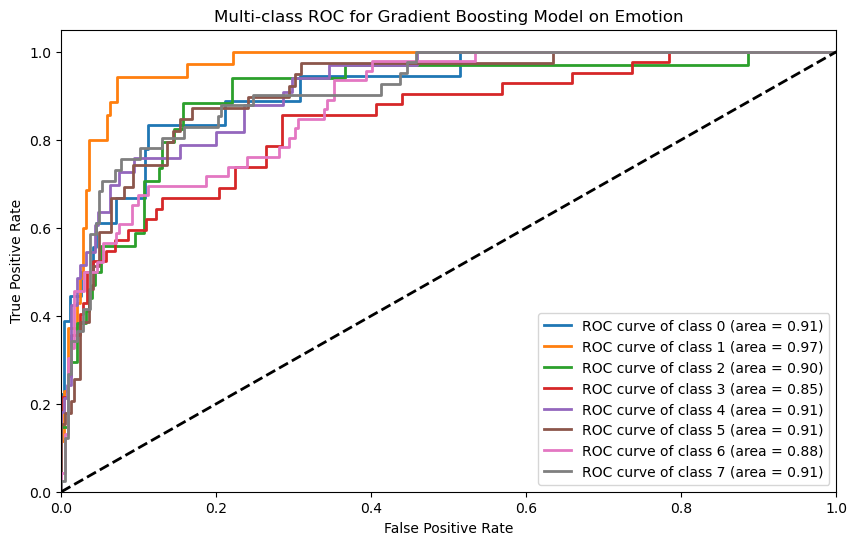

In [21]:
# plotting the curves for each class
import seaborn as sns
plt.figure(figsize=(10, 6))
# Generate 'n_classes' distinct colors
colors_gb = sns.color_palette(None, n_classes_gb)
for i, color in zip(range(n_classes_gb), colors_gb):
    plt.plot(fpr_gb[i], tpr_gb[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_gb[i]))
# Plot the ROC curves

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Gradient Boosting Model on Emotion')
plt.legend(loc="lower right")
# save the plot to a file
plt.savefig('../images/ROC_chart_gb_emotion.png')
plt.show()
plt.close()

In [22]:
# calculating the purity of the gradient boosting model
purity_gb = np.mean([max(x) for x in y_score_gb])
purity_gb

0.566036970207655

### Random Forest Emotion Model

In [23]:
y_score_rf_emotion = rf_classifier_emotion.predict_proba(X_test_emotion)

# Binarize the labels for the true classes
y_test_binarized_rf_emotion = label_binarize(y_test_emotion, classes=np.unique(y_test_emotion))

# To store the ROC curve and ROC area for each class
n_classes_rf_emotion = y_test_binarized_rf_emotion.shape[1]
fpr_rf_emotion = dict()
tpr_rf_emotion = dict()
roc_auc_rf_emotion = dict()

In [24]:
# calculating the scores for each class
for i in range(n_classes_rf_emotion):
    fpr_rf_emotion[i], tpr_rf_emotion[i], _ = roc_curve(y_test_binarized_rf_emotion[:, i], y_score_rf_emotion[:, i])
    roc_auc_rf_emotion[i] = auc(fpr_rf_emotion[i], tpr_rf_emotion[i])

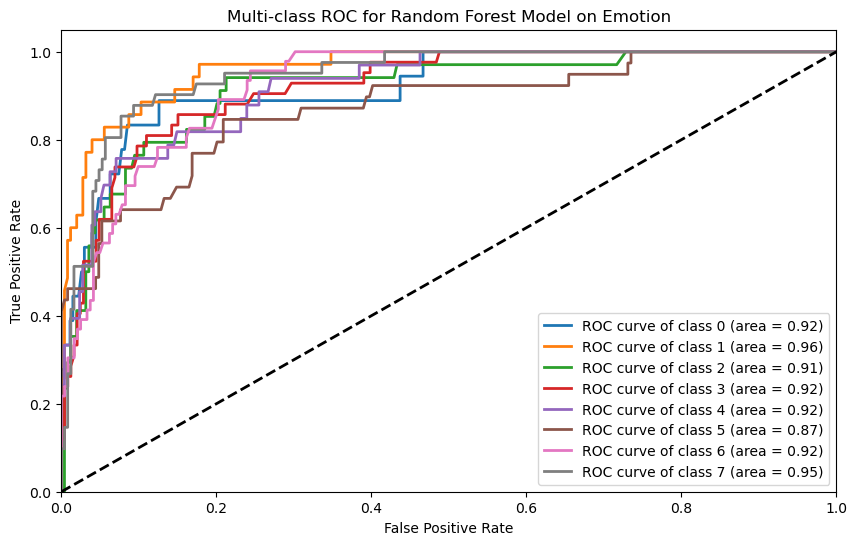

In [25]:
plt.figure(figsize=(10, 6))
# Generate 'n_classes' distinct colors
colors_rf_emotion = sns.color_palette(None, n_classes_rf_emotion)
for i, color in zip(range(n_classes_rf_emotion), colors_rf_emotion):
    plt.plot(fpr_rf_emotion[i], tpr_rf_emotion[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_rf_emotion[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Random Forest Model on Emotion')
plt.legend(loc="lower right")
# save the plot to an image
plt.savefig('../images/ROC_chart_rf_emotion.png')
plt.show()
plt.close()

In [26]:
# calculating the purity of the random forest model for emotion
purity_rf_emotion = np.mean([max(x) for x in y_score_rf_emotion])
purity_rf_emotion

0.34519675925925924

## Emotional Intensity (Binary ROC)

### Random Forest Emotional Intensity Model

In [27]:
# we have 2 classes, so a regular auc method can be used
y_test_emotional_intensity.value_counts()

emotional_intensity
0                      177
1                      111
dtype: int64

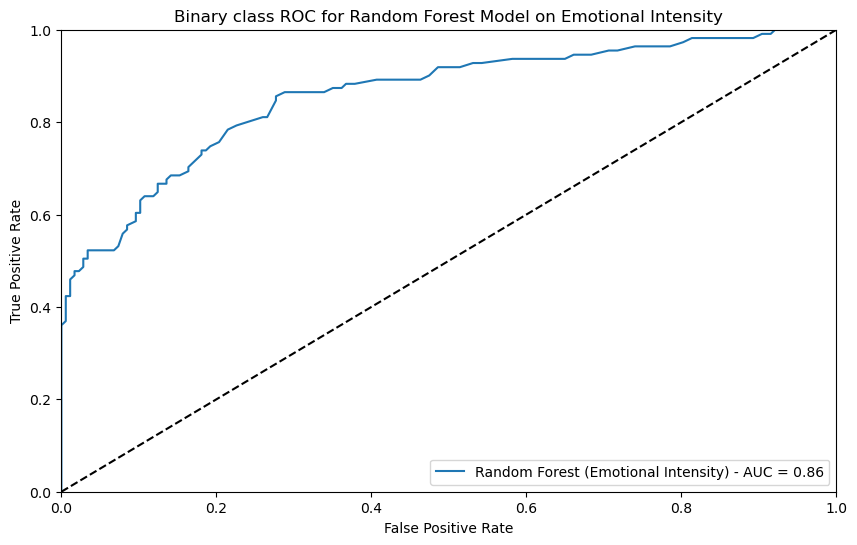

In [28]:
# Calculate the AUC score
auc_rf_emotional_intensity = roc_auc_score(y_test_emotional_intensity, rf_classifier_emotional_intensity.predict_proba(X_test_emotional_intensity)[:, 1])


# Calculate the false positive rate and true positive rate for each model
fpr_rf_emotional_intensity, tpr_rf_emotional_intensity, _ = roc_curve(y_test_emotional_intensity, rf_classifier_emotional_intensity.predict_proba(X_test_emotional_intensity)[:, 1])

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_emotional_intensity, tpr_rf_emotional_intensity, label='Random Forest (Emotional Intensity) - AUC = {:.2f}'.format(auc_rf_emotional_intensity))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary class ROC for Random Forest Model on Emotional Intensity')
plt.legend(loc='lower right')
#save the plot to an image
plt.savefig('../images/ROC_chart_rf_emotional_intensity.png')
plt.show()
plt.close()

In [29]:
# calculating the purity of the random forest model for emotional intensity
purity_rf_emotional_intensity = np.mean([max(x) for x in rf_classifier_emotional_intensity.predict_proba(X_test_emotional_intensity)])
purity_rf_emotional_intensity

0.7270486111111111

## Plotting the Charts together

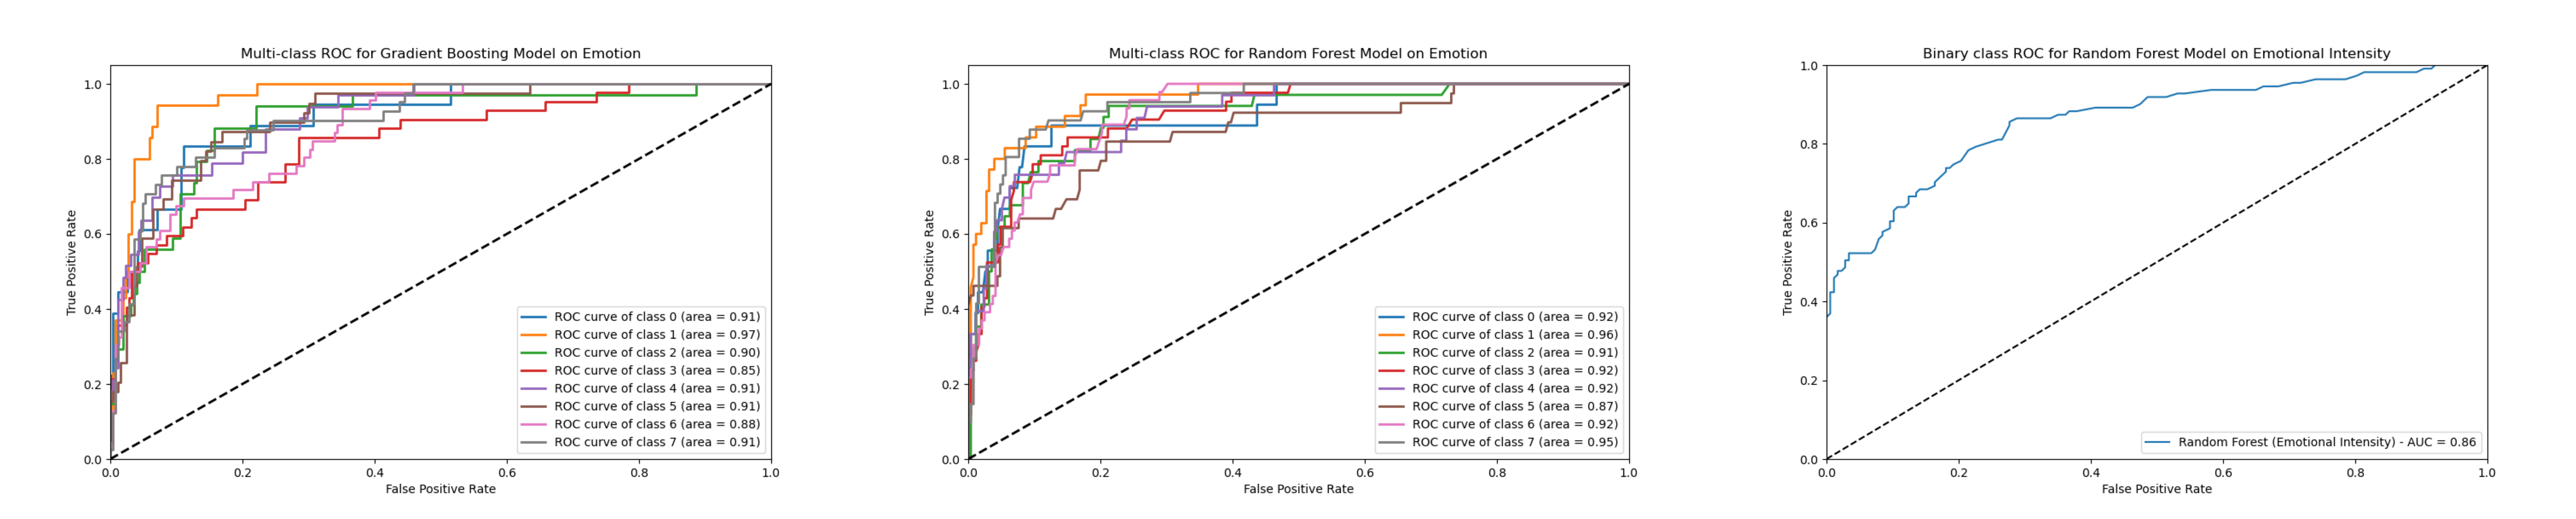

In [30]:
# plot a grid of all the ROC curves
import matplotlib.image as mpimg

fig, axs = plt.subplots(1, 3, figsize=(70, 21))  # Adjust the size as needed

# Load and display the first plot
gb_emotion_chart = mpimg.imread('../images/ROC_chart_gb_emotion.png')
axs[0].imshow(gb_emotion_chart)
axs[0].axis('off')  # Turn off axis


# Load and display the second plot
rf_emotion_chart = mpimg.imread('../images/ROC_chart_rf_emotion.png')
axs[1].imshow(rf_emotion_chart)
axs[1].axis('off')


# Continue for the other plots
rf_emotional_intensity_chart = mpimg.imread('../images/ROC_chart_rf_emotional_intensity.png')
axs[2].imshow(rf_emotional_intensity_chart)
axs[2].axis('off')
plt.tight_layout()
plt.show()

### Plotting a grid of the confusion metrics for inclusion in readme

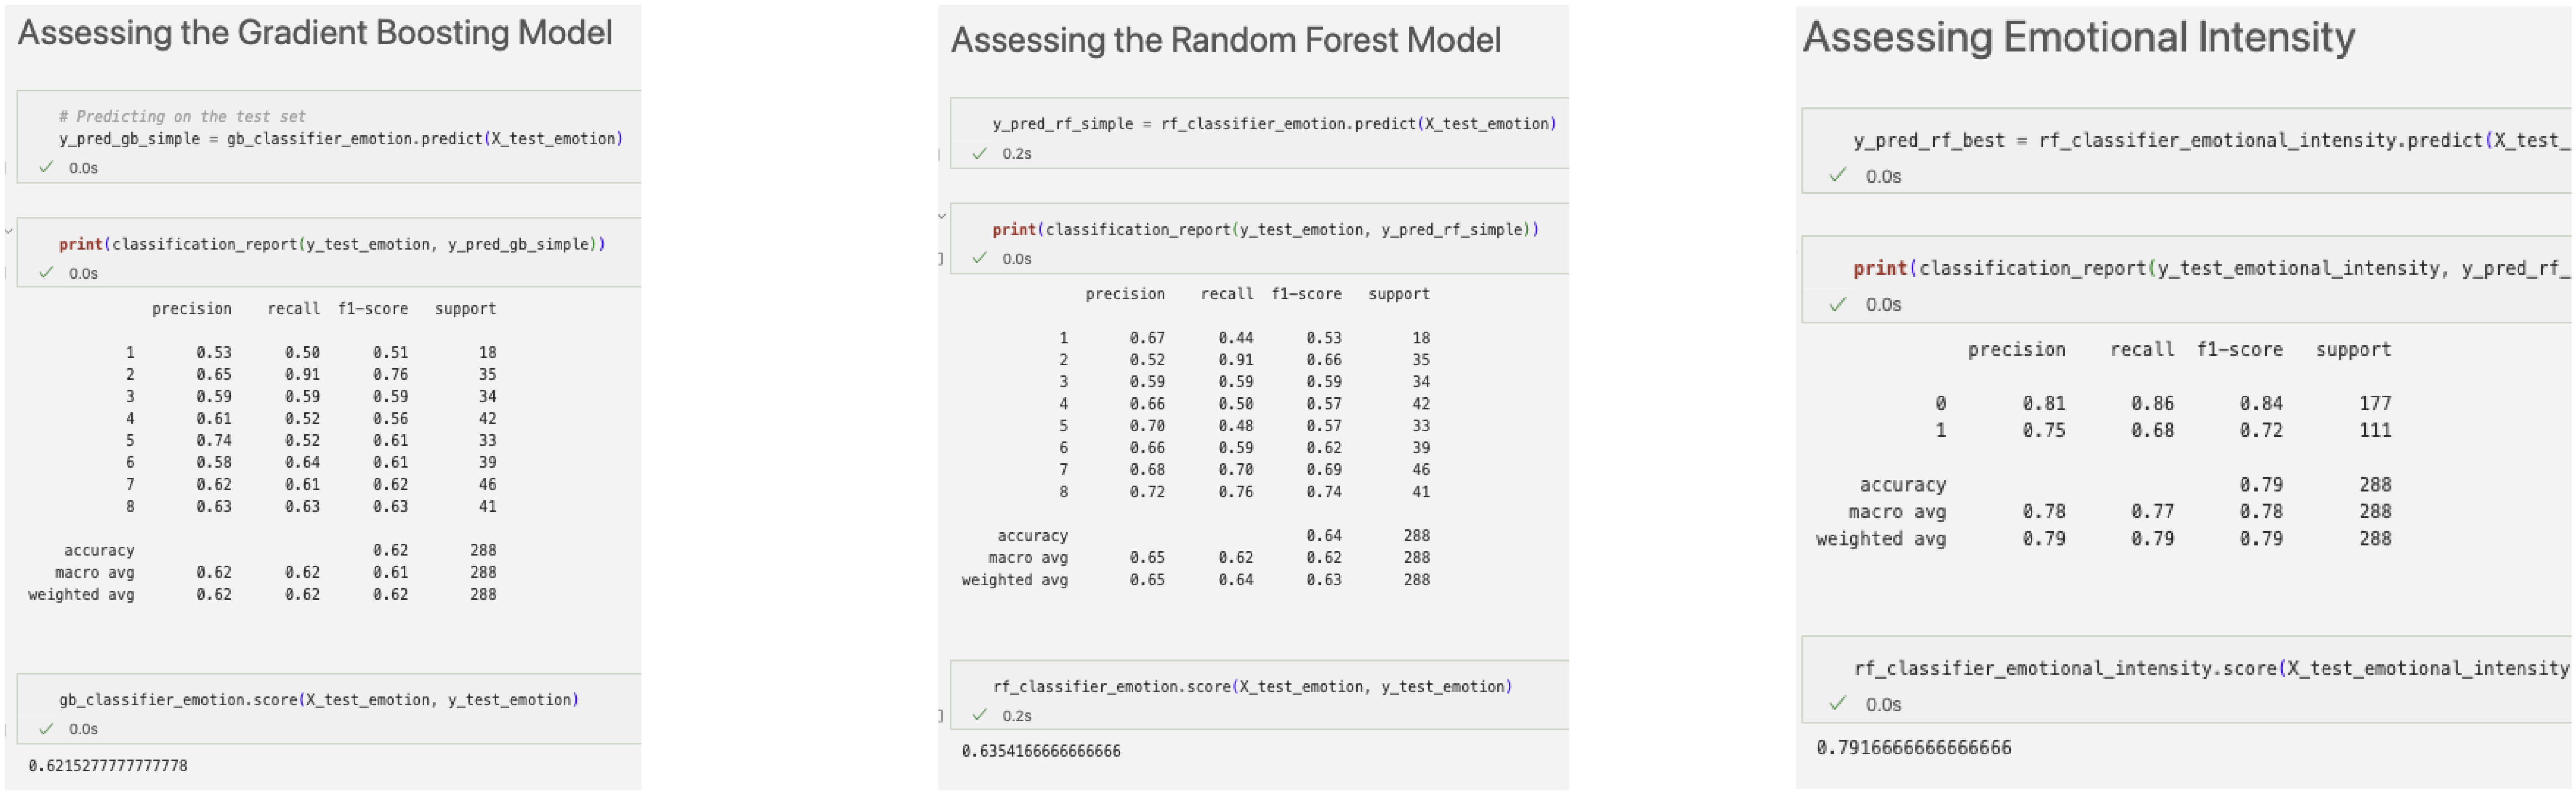

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(70, 21))  # Adjust the size as needed

# Load and display the first plot
gb_emotion_metrics = mpimg.imread('../images/gb_emotion_metrics.png')
axs[0].imshow(gb_emotion_metrics)
axs[0].axis('off')  # Turn off axis
axs[0].margins(0, 0)

# Load and display the second plot
rf_emotion_metrics = mpimg.imread('../images/rf_emotion_metrics.png')
axs[1].imshow(rf_emotion_metrics)
axs[1].axis('off')
axs[1].margins(0, 0)

# Continue for the other plots
rf_intensity_metrics = mpimg.imread('../images/rf_intensity_metrics.png')
axs[2].imshow(rf_intensity_metrics)
axs[2].axis('off')
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
#plt.tight_layout(pad = 0)  # Optional
axs[2].margins(0, 0)
plt.show()